## Homework # 2: AI 240 Machine Learning Course
### Instructor - Dr. Uma Gajendragadkar
## Heart Disease Prediction with Logistic Regression
### Learning Topic - Logistic Regression Algorithm in Machine Learning
 
 ### Problem - To develop a machine learning model to predict potential heart disease cases early on.

## Step 1 - Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

## Step 2 - Load and Explore the Data

In [2]:
df = pd.read_csv('heart_data.csv')

df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
850,58,1,1,120,284,0,0,160,0,1.8,1,0,2,0
457,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
412,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
35,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
174,54,1,0,110,239,0,1,126,1,2.8,1,1,3,0
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
917,47,1,2,130,253,0,1,179,0,0.0,2,0,2,1
814,62,1,1,128,208,1,0,140,0,0.0,2,0,2,1
585,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
45,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1


### Basic Information about the Data

In [3]:
# df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Check for Missing Values

In [4]:
# Check how many missing (NaN) values are in each column of the DataFrame
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Step 3 - Prepare the Data

In [5]:
# Split features and target
X = df.drop('target', axis=1) #features
y = df['target']  #target variable

# Normalize the features
# Standardize the input features so they all have the same scale (mean = 0, std = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Step 4 - Train Logistic Regression Model

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Step 5 - Make Predictions

In [7]:
# Predict on the test set
y_pred = model.predict(X_test)

## Step 6 - Evaluate the Model

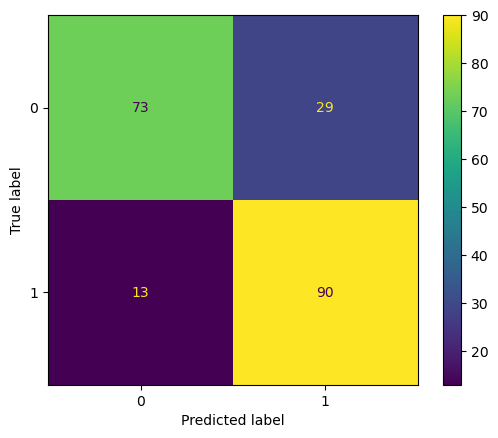

Accuracy: 0.80
                       precision    recall  f1-score   support

without heart disease       0.85      0.72      0.78       102
   with heart disease       0.76      0.87      0.81       103

             accuracy                           0.80       205
            macro avg       0.80      0.79      0.79       205
         weighted avg       0.80      0.80      0.79       205



In [8]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

target_names = ['without heart disease', 'with heart disease']
print(classification_report(y_test, y_pred, target_names=target_names))